<a href="https://colab.research.google.com/github/micaelCZ/Paper_Repositorio/blob/main/CNN%2BAE_Escenario_3_pero_con_el_escenario_csv_del_Jonathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>CNN + AE - Escenario experimental 3</header1></center>

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [30]:
datapath = 'https://raw.githubusercontent.com/beespinosa1/Inter/main/Escenario3.csv'
names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']
dataframe = pd.read_csv(datapath,names=names,low_memory=False, sep=',')

In [31]:
dataframe.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [32]:
columna_a_codificar = dataframe['srcip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['srcip'] = columna_codificada

In [33]:
columna_a_codificar = dataframe['dstip']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dstip'] = columna_codificada

In [34]:
columna_a_codificar = dataframe['dsport']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dsport'] = columna_codificada

In [35]:
columna_a_codificar = dataframe['proto']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['proto'] = columna_codificada

In [36]:
columna_a_codificar = dataframe['state']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['state'] = columna_codificada

In [37]:
columna_a_codificar = dataframe['dur']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['dur'] = columna_codificada

In [38]:
columna_a_codificar = dataframe['service']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['service'] = columna_codificada

In [39]:
columna_a_codificar = dataframe['Sload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sload'] = columna_codificada

In [40]:
columna_a_codificar = dataframe['Dload']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dload'] = columna_codificada

In [41]:
columna_a_codificar = dataframe['Sjit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sjit'] = columna_codificada

In [42]:
columna_a_codificar = dataframe['Djit']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Djit'] = columna_codificada

In [43]:
columna_a_codificar = dataframe['Sintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Sintpkt'] = columna_codificada

In [44]:
columna_a_codificar = dataframe['Dintpkt']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['Dintpkt'] = columna_codificada

In [45]:
columna_a_codificar = dataframe['ct_ftp_cmd']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['ct_ftp_cmd'] = columna_codificada

In [46]:
columna_a_codificar = dataframe['attack_cat']
le = LabelEncoder()
columna_codificada = le.fit_transform(columna_a_codificar)
dataframe['attack_cat'] = columna_codificada

In [47]:
# Separar las características del conjunto de datos en una matriz separada
X = dataframe.iloc[:, :-1].values

In [48]:
# Escalar características
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [49]:
y = dataframe['label']

In [50]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Definir la función para crear el modelo
def create_model():
    model = Sequential([
        Conv1D(64, 3, input_shape=(X_train.shape[1], 1), padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
        MaxPooling1D(2),
        Dropout(0.3),
        Conv1D(32, 3, padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
        MaxPooling1D(2),
        Dropout(0.3),
        Conv1D(16, 3, padding="same", activation="relu", kernel_constraint=MaxNorm(3)),
        MaxPooling1D(2),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation="sigmoid"),
    ])
    
    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Crear una instancia de KerasClassifier para usar en GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)

# Definir los hiperparámetros para Grid Search
param_grid = {
    'epochs': [50, 70, 100],
    'batch_size': [32, 64]
}

# Crear instancia del objeto GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores parámetros: ", grid_search.best_params_)

<ipython-input-51-209061acdd07>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Mejores parámetros:  {'batch_size': 32, 'epochs': 50}


In [52]:
batch_size = 32
steps_per_epoch = (X_train.shape[0]//batch_size)
validation_steps = (X.shape[0] // batch_size)

es = EarlyStopping(monitor='accuracy', mode='min', verbose=1, patience=200)

In [53]:
%%time

# Entrenar el modelo
model.fit(X_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 50,
    validation_data=(X_test, y_test),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

Epoch 1/50
72/76 [===========================>..] - ETA: 0s - loss: 0.2171 - accuracy: 0.9627

76/76 [==============================] - 3s 21ms/step - loss: 0.2169 - accuracy: 0.9622 - val_loss: 0.1326 - val_accuracy: 0.9657
Epoch 2/50
76/76 [==============================] - 1s 9ms/step - loss: 0.1284 - accuracy: 0.9653
Epoch 3/50
76/76 [==============================] - 1s 9ms/step - loss: 0.0930 - accuracy: 0.9661
Epoch 4/50
76/76 [==============================] - 1s 9ms/step - loss: 0.0495 - accuracy: 0.9764
Epoch 5/50
76/76 [==============================] - 1s 10ms/step - loss: 0.0167 - accuracy: 0.9950
Epoch 6/50
76/76 [==============================] - 1s 10ms/step - loss: 0.0110 - accuracy: 0.9975
Epoch 7/50
76/76 [==============================] - 1s 10ms/step - loss: 0.0063 - accuracy: 0.9979
Epoch 8/50
76/76 [==============================] - 1s 9ms/step - loss: 0.0066 - accuracy: 0.9983
Epoch 9/50
76/76 [==============================] - 1s 8ms/step - loss: 0.0046 - accuracy: 0.9983
Epoch 10/50
76/76 [==============================] - 1s 8ms/step - loss: 0.0037 - a

In [54]:
# Evaluar rendimiento del modelo en datos de prueba
score = model.score(X_test, y_test)
print('test_accuracy: %.2f' % (score * 100.0))



test_accuracy: 100.00


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# predecir probabilidades de modelo para datos de prueba
model_probs = model.predict(X_test, verbose=0)
# predecir clases para datos de prueba
model_classes = np.argmax(model_probs,axis=1)
# reducir a un array de 1 dimensión
model_probs = model_probs[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, model_classes)*100
# precision tp / (tp + fp)
precision = precision_score(y_test, model_classes, average='weighted')*100
# recall: tp / (tp + fn)
recall = recall_score(y_test, model_classes, average='weighted')*100
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

Accuracy: 96.57
F1 score: 94.89
Precision: 93.26
Recall: 96.57


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grafico Roc Curve

33/33 [==============================] - 0s 3ms/step


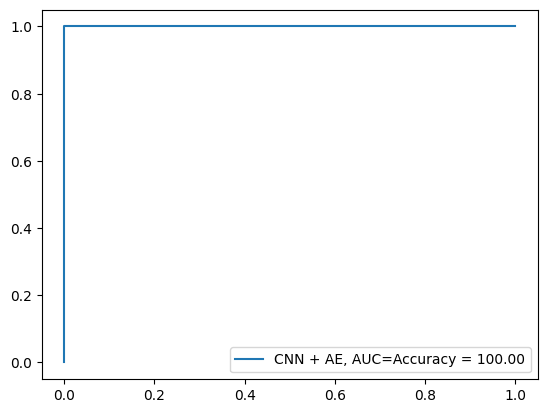

In [56]:
import matplotlib.pyplot as plt
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
CNN = "Accuracy = {:.2f}".format(accuracy*100)
plt.plot(fpr, tpr, label="CNN + AE, AUC=" + str(CNN))
plt.legend()